# Clustering of PylRS and tRNAPyl sequences

## References

#### Clustal Omega

Sievers, F. et al. Fast, scalable generation of high‐quality protein multiple sequence alignments using Clustal Omega. Molecular Systems Biology 7, 539 (2011). https://doi.org:10.1038/msb.2011.75
        
        
#### Previously characterized class A / class B PylRS/tRNA pair data

Dunkelmann, D.L., Willis, J.C.W., Beattie, A.T. et al. Engineered triply orthogonal pyrrolysyl–tRNA synthetase/tRNA pairs enable the genetic encoding of three distinct non-canonical amino acids. Nat. Chem. 12, 535–544 (2020). https://doi.org/10.1038/s41557-020-0472-x


#### RNAfold

Gruber, A. R., Lorenz, R., Bernhart, S. H., Neubock, R. & Hofacker, I. L. The Vienna RNA Websuite. Nucleic Acids Research 36, W70-W74 (2008). https://doi.org:10.1093/nar/gkn188

Lorenz, R. et al. ViennaRNA Package 2.0. Algorithms for Molecular Biology 6, 26 (2011). https://doi.org:10.1186/1748-7188-6-26


#### ARAGORN

Laslett, D. ARAGORN, a program to detect tRNA genes and tmRNA genes in nucleotide sequences. Nucleic Acids Research 32, 11-16 (2004). https://doi.org:10.1093/nar/gkh152

## Imports

In [1]:
# (python version 3.9.7)
# (jupyter-notebook version 6.4.5)

import pandas as pd #version 1.3.4

import numpy as np #version 1.22.0

from sklearn.cluster import AgglomerativeClustering #version 1.0.1

from Bio import SeqIO #version 1.79

import scipy #version 1.7.2
from scipy.cluster.hierarchy import dendrogram 

import seaborn as sns #version 0.11.2

import matplotlib #version 3.5.2
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap, Normalize, TwoSlopeNorm #DivergingNorm - deprecated


## 1 - Analysis of previously characterised PylRS and tRNA sequences 

### 1.1 - Generation of percentage identity matrices and hierarchical clustering thereof

First, we load in the MSA of the PylRS C-terminal domains 
generated using BLASTp - https://blast.ncbi.nlm.nih.gov/Blast.cgi
and clustal omega -  https://www.ebi.ac.uk/Tools/msa/clustalo/

In [2]:
allpylrs_description_msa_df = pd.read_csv(r'All-PylRS-Description-Table-MSA.csv')

allpylrs_description_msa_df

,Domain,Description,Scientific Name,Identifier,Taxid,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,Sequence,Full MSA Sequence,CTD MSA Sequence
0,Arch,hypothetical protein [Candidatus Methanomethyl...,Candidatus Methanomethylophilus alvus,Malv.5008,1291540,574,574,100%,0.000000e+00,100.00,275,WP_015505008.1,MTVKYTDAQIQRLREYGNGTYEQKVFEDLASRDAAFSKEMSVASTD...,----------------------------------------------...,MTVKYTDAQIQRLREYGNGTY----E--QKVFE--DLASRDAAFSK...
1,Arch,hypothetical protein [Candidatus Methanomethyl...,Candidatus Methanomethylophilus sp. 1R26,Msp.7239,1769296,481,481,100%,9.000000e-172,82.18,275,WP_058747239.1,MAEHFTDAQIQRLREYGNGTYKDMEFADVSAREKAFTKLMSDASRD...,----------------------------------------------...,MAEHFTDAQIQRLREYGNGTY----K--DMEFA--DVSAREKAFTK...
2,Arch,Seryl-tRNA synthetase [Thermoplasmatales archa...,Thermoplasmatales archaeon BRNA1,Tarc.8081,1054217,458,458,99%,5.000000e-163,78.75,273,AGI48081.1,MKYTDAQIQKLREYGNGDYSGAEFDDASARDKAFSRDMSAATKDNE...,----------------------------------------------...,--MKYTDAQIQKLREYGNGDY----S--GAEFD--DASARDKAFSR...
3,Arch,hypothetical protein [Thermoplasmata archaeon],Thermoplasmata archaeon,Tarc.7271,1906666,386,386,100%,2.000000e-134,67.64,274,MBE6527271.1,MSYTFTDPQIQRLREFGDDPRSKETFETEEERDKAFSKLMGKLQSE...,----------------------------------------------...,MSYTFTDPQIQRLREFGDDPR----S--KETFE--TEEERDKAFSK...
4,Arch,hypothetical protein [Candidatus Methanomethyl...,Candidatus Methanomethylophilus sp.,Msp.3097,2774294,380,380,100%,2.000000e-132,66.55,274,MBO4503097.1,MTCKLTDPQIQRLREYGHEPKNESEFETEAERDKAFTKMMSKLQRE...,----------------------------------------------...,MTCKLTDPQIQRLREYGHEPK----N--ESEFE--TEAERDKAFTK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Bact,TPA: pyrrolysine--tRNA(Pyl) ligase large subun...,Desulfobacterales bacterium,Dbac.3934,2044940,192,192,98%,5.000000e-56,37.77,281,HHC23934.1,MHELNWTDVQRHRLKTLNAPPNTLKDQFETASQRNRAFQDIEKQLV...,----------------------------------------------...,HELNWTDVQRHRLKTLNAPPN----TL-KDQFE--TASQRNRAFQD...
347,Bact,pyrrolysine--tRNA(Pyl) ligase large subunit [D...,Deltaproteobacteria bacterium,Dbac.7531,2026735,191,191,98%,8.000000e-56,37.77,281,RLC07531.1,MNELNWTDVQRHRLKTLNAPPNTLKDQFETASQRNRAFQDIEKQLV...,----------------------------------------------...,NELNWTDVQRHRLKTLNAPPN----TL-KDQFE--TASQRNRAFQD...
348,Bact,pyrrolysine--tRNA(Pyl) ligase large subunit [F...,Firmicutes bacterium HGW-Firmicutes-11,Fbac.5844,2013772,188,188,98%,1.000000e-54,39.71,282,PKM85844.1,MNGTFLTQTQKQRLAELGAPESGIAAAFSDTASRDLFFKETEATLI...,----------------------------------------------...,NGTFLTQTQKQRLAELGAPES----GI-AAAFS--DTASRDLFFKE...
349,Bact,pyrrolysine--tRNA(Pyl) ligase large subunit [A...,Aminipila sp. CBA3637,Asp.2719,2697030,172,172,85%,1.000000e-48,42.74,243,WP_162362719.1,MEKFTITQKERIGELNGTTEMMEMEFETIENRDSSFREMEKSMVKE...,----------------------------------------------...,-MEKFTITQKERIGELNGTTE----MM-EMEFE--TIENRDSSFRE...


In [3]:
def get_pid(seq1, seq2):
    #calculate percentage id.
    
    seq1 = str(seq1)
    seq2 = str(seq2)
    
    assert(len(seq1) == len(seq2))
    
    matching = 0 #total number of shared residues excluding shared gaps
    total = 0 #total number of residues excluding shared gaps
    
    for i, char in enumerate(seq1):
        
        if char == "-" and seq2[i] == "-":
            continue
            
        total = total+1
        
        if char == seq2[i]:
            matching = matching + 1
        
    return round(100*(matching/total),3)
    

In [4]:
allpylrs_pid_matrix = np.zeros((len(allpylrs_description_msa_df), len(allpylrs_description_msa_df)))

for i in range(0, len(allpylrs_description_msa_df)):
    
    for j in range(0, len(allpylrs_description_msa_df)):
        
        seq_i = allpylrs_description_msa_df.iloc[i]["CTD MSA Sequence"]
        seq_j = allpylrs_description_msa_df.iloc[j]["CTD MSA Sequence"]
        
        pid = get_pid(seq_i, seq_j)
        
        allpylrs_pid_matrix[i][j] = pid
        
        
allpylrs_pid_matrix

array([[100.   ,  82.182,  78.182, ...,  37.943,  35.587,  36.918],
       [ 82.182, 100.   ,  74.909, ...,  37.589,  34.52 ,  35.484],
       [ 78.182,  74.909, 100.   , ...,  35.816,  33.214,  33.333],
       ...,
       [ 37.943,  37.589,  35.816, ..., 100.   ,  37.809,  36.17 ],
       [ 35.587,  34.52 ,  33.214, ...,  37.809, 100.   ,  25.177],
       [ 36.918,  35.484,  33.333, ...,  36.17 ,  25.177, 100.   ]])

In [5]:
allpylrs_pid_matrix_df = pd.DataFrame(allpylrs_pid_matrix, 
                                      columns = allpylrs_description_msa_df["Identifier"],
                                      index = allpylrs_description_msa_df["Identifier"])
allpylrs_pid_matrix_df


Identifier,Malv.5008,Msp.7239,Tarc.8081,Tarc.7271,Msp.3097,Msp.9260,Msp.2247,Msp.8418,IH5.5040,Msp.8905,...,Dinf.6409,Dbac.9416,Dsp.4212,Sbac.6259,Pbac.4254,Dbac.3934,Dbac.7531,Fbac.5844,Asp.2719,Abac.7547
Identifier,,,,,,,,,,,,,,,,,,,,,
Malv.5008,100.000,82.182,78.182,67.636,66.545,66.545,66.182,65.455,65.091,64.727,...,38.434,39.858,39.209,36.972,37.367,36.299,36.299,37.943,35.587,36.918
Msp.7239,82.182,100.000,74.909,64.727,62.909,64.000,63.636,62.545,63.273,61.818,...,37.367,38.434,41.367,37.676,37.011,37.367,37.367,37.589,34.520,35.484
Tarc.8081,78.182,74.909,100.000,62.909,61.091,62.182,61.818,60.364,60.000,60.364,...,37.367,36.655,39.855,35.915,34.875,35.587,35.587,35.816,33.214,33.333
Tarc.7271,67.636,64.727,62.909,100.000,80.292,81.022,80.657,79.197,79.197,78.832,...,39.858,38.434,40.433,37.676,39.146,38.434,38.434,38.652,36.299,36.331
Msp.3097,66.545,62.909,61.091,80.292,100.000,97.445,97.810,96.350,95.620,95.255,...,38.434,39.858,38.267,37.676,38.790,38.790,38.790,38.298,35.943,36.331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dbac.3934,36.299,37.367,35.587,38.434,38.790,38.790,38.790,38.434,39.502,38.434,...,49.643,61.922,42.403,47.887,56.786,100.000,99.286,44.170,32.862,33.571
Dbac.7531,36.299,37.367,35.587,38.434,38.790,38.790,38.790,38.434,39.502,38.434,...,50.000,61.566,42.049,48.239,56.429,99.286,100.000,44.170,32.862,33.214
Fbac.5844,37.943,37.589,35.816,38.652,38.298,37.943,37.943,37.589,37.943,37.234,...,41.696,44.014,39.437,42.657,43.110,44.170,44.170,100.000,37.809,36.170


In [6]:
#We want to determine %id thresholds for aaRSs based on the class A and class B data from https://www.nature.com/articles/s41557-020-0472-x

#So let's extract the pid matrix for the following synthetases:
#class A:
#1R26 - identifier Msp.7239
#Alv - identifier Malv.5008
#G1 - identifier IG1.3702
#H5 - identifier IH5.5040
#Term - identifier Mter.1907

#class B:
#030 - identifier Marc.7871
#Int - identifier Mint.8777
#Lum1 - identifier Mlum.9105
#Lum2 - identifier Mlum.4533
#RumEn - identifier Marc.1560
#Sheng - identifier Mshe.6913

delta_A_B_RS_identifiers = ["Msp.7239", "Malv.5008", "IG1.3702", "IH5.5040", "Mter.1907", 
                         "Marc.7871", "Mint.8777", "Mlum.9105", "Mlum.4533", "Marc.1560", "Mshe.6913"]

delta_A_B_RS_pid_matrix_df = allpylrs_pid_matrix_df.copy(deep=True)

ids_to_remove = [idd for idd in allpylrs_pid_matrix_df.index if idd not in delta_A_B_RS_identifiers]

delta_A_B_RS_pid_matrix_df = delta_A_B_RS_pid_matrix_df.drop(columns=ids_to_remove)
delta_A_B_RS_pid_matrix_df = delta_A_B_RS_pid_matrix_df.drop(index=ids_to_remove)

delta_A_B_RS_pid_matrix_df

Identifier,Malv.5008,Msp.7239,IH5.5040,IG1.3702,Mter.1907,Marc.1560,Marc.7871,Mlum.9105,Mint.8777,Mlum.4533,Mshe.6913
Identifier,,,,,,,,,,,
Malv.5008,100.000,82.182,65.091,64.000,65.091,50.725,49.275,49.638,49.275,47.464,46.237
Msp.7239,82.182,100.000,63.273,63.636,63.636,52.174,48.913,48.188,49.275,46.377,45.520
IH5.5040,65.091,63.273,100.000,60.584,62.774,50.545,51.273,51.273,49.091,49.818,48.201
IG1.3702,64.000,63.636,60.584,100.000,63.504,50.545,49.818,45.818,53.818,45.091,47.482
Mter.1907,65.091,63.636,62.774,63.504,100.000,56.000,52.000,50.182,52.727,50.545,51.439
Marc.1560,50.725,52.174,50.545,50.545,56.000,100.000,65.091,54.545,68.364,59.273,55.036
Marc.7871,49.275,48.913,51.273,49.818,52.000,65.091,100.000,56.364,62.909,66.545,56.475
Mlum.9105,49.638,48.188,51.273,45.818,50.182,54.545,56.364,100.000,54.909,56.364,57.194
Mint.8777,49.275,49.275,49.091,53.818,52.727,68.364,62.909,54.909,100.000,57.091,54.317


The above class A and B PylRS percentage identities are plotted against experimental activity data (GFP expression in the presence of a given tRNA and RS) in Figure 1a (using GraphPad Prism version 9.3.1 for Mac).

Based on this, we established that a cut-off around 55% sequence identity between PylRSs was useful for predicting whether a PylRS would be active with the cognate tRNA of another PylRS (PylRSs with greater than 55% sequence identity were active with each other's tRNAs in 88% of cases).

Indeed, clustering the PylRSs using an (average linkage) threshold distance corresponding to 55% sequence identity recapitulates the class A / class B divide:

In [7]:
#Let's try clustering these PylRSs and see what clusters we get.

delta_A_B_RS_pid_matrix = delta_A_B_RS_pid_matrix_df.to_numpy()

#convert percentage identity to distance (fyi - https://stackoverflow.com/questions/4064630/how-do-i-convert-between-a-measure-of-similarity-and-a-measure-of-difference-di)
delta_A_B_RS_dist_matrix = (100-delta_A_B_RS_pid_matrix)/100

print("Average linkage")
clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0.45).fit(delta_A_B_RS_dist_matrix)
#average linkage - the proximity between two clusters is the average proximity between their objects (UPGMA)
#a distance threshold corresponding to 55% sequence identity is used

for i in range(0, max(clustering.labels_)+1):
    
    for j, label in enumerate(clustering.labels_):
        if label == i:
            print(delta_A_B_RS_pid_matrix_df.index[j].ljust(10), i)
    

Average linkage
Marc.1560  0
Marc.7871  0
Mlum.9105  0
Mint.8777  0
Mlum.4533  0
Mshe.6913  0
Malv.5008  1
Msp.7239   1
IH5.5040   1
IG1.3702   1
Mter.1907  1


Corresponding to the class A (printed with a '1') / class B (printed with a '0') division.

We can do the same for the previously characterized class A / class B tRNAs.  The MSA of these tRNAs was produced by manual alignment based on the cloverleaf structures of these tRNAs as predicted by ARAGORN and RNAfold.

Note: in all in vivo characterization experiments in E. coli, if PyltRNAs differed from the canonical tRNA sequence at the anticodon loop ('CTCTAAA'), mutants with the canonical loop were prepared and used instead of the wild-type sequence.  Therefore these mutant sequences are also used for clustering.

In [8]:
delta_A_B_tRNAs_manual_aligned_seqrecords = []
delta_A_B_tRNAs_manual_aligned_names = []

for record in SeqIO.parse("PylT_A_B_manual_aligned.txt",format="fasta"):
    
    delta_A_B_tRNAs_manual_aligned_seqrecords.append(record)
    delta_A_B_tRNAs_manual_aligned_names.append(record.id)


In [9]:
import numpy as np

delta_A_B_tRNA_pid_matrix = np.zeros((len(delta_A_B_tRNAs_manual_aligned_seqrecords), len(delta_A_B_tRNAs_manual_aligned_seqrecords)))

for i in range(0, len(delta_A_B_tRNAs_manual_aligned_seqrecords)):
    for j in range(0, len(delta_A_B_tRNAs_manual_aligned_seqrecords)):
        
        seq_i = str(delta_A_B_tRNAs_manual_aligned_seqrecords[i].seq)
        seq_j = str(delta_A_B_tRNAs_manual_aligned_seqrecords[j].seq)
        
        pid = get_pid(seq_i, seq_j)
        delta_A_B_tRNA_pid_matrix[i][j] = pid


delta_A_B_tRNA_pid_matrix_df = pd.DataFrame(delta_A_B_tRNA_pid_matrix, columns = delta_A_B_tRNAs_manual_aligned_names, index = delta_A_B_tRNAs_manual_aligned_names)

delta_A_B_tRNA_pid_matrix_df

,1R26,Alv,BRNA,G1,H5,Term,030,Int,Lum1,Lum2,RumEn,Sheng
1R26,100.000,94.366,100.000,81.944,94.366,78.873,69.444,66.667,68.056,68.056,68.056,68.056
Alv,94.366,100.000,94.366,83.333,94.366,83.099,73.611,70.833,72.222,72.222,72.222,72.222
BRNA,100.000,94.366,100.000,81.944,94.366,78.873,69.444,66.667,68.056,68.056,68.056,68.056
G1,81.944,83.333,81.944,100.000,86.111,69.444,72.603,71.233,72.603,72.603,72.603,73.973
H5,94.366,94.366,94.366,86.111,100.000,77.465,73.611,70.833,72.222,72.222,72.222,72.222
Term,78.873,83.099,78.873,69.444,77.465,100.000,71.831,67.606,66.667,70.423,68.056,69.014
030,69.444,73.611,69.444,72.603,73.611,71.831,100.000,92.958,88.889,91.549,88.889,88.732
Int,66.667,70.833,66.667,71.233,70.833,67.606,92.958,100.000,95.833,92.958,95.833,90.141
Lum1,68.056,72.222,68.056,72.603,72.222,66.667,88.889,95.833,100.000,91.667,95.833,88.889
Lum2,68.056,72.222,68.056,72.603,72.222,70.423,91.549,92.958,91.667,100.000,91.667,94.366


The above class A and B tRNA percentage identities are plotted against experimental activity data (GFP expression in the presence of a given tRNA and RS) in Figure 1b (using GraphPad Prism version 9.3.1 for Mac).

Based on this, we established that a cut-off around 75% sequence identity between tRNAs was useful for predicting whether a tRNA would be active with the cognate PylRS of another tRNA (tRNAs with greater than 75% sequence identity were active with each other's tRNAs in 93% of cases).

Indeed, clustering the tRNAs using an (average linkage) threshold distance corresponding to 75% sequence identity recapitulates the class A / class B divide:

In [10]:
#Let's try clustering these tRNAs and see what clusters we get.  Again we can try different linkage methods:

delta_A_B_tRNA_pid_matrix = delta_A_B_tRNA_pid_matrix_df.to_numpy()

#convert percentage identity to distance
delta_A_B_tRNA_dist_matrix = (100-delta_A_B_tRNA_pid_matrix)/100
    
print("Average linkage")
clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0.25).fit(delta_A_B_tRNA_dist_matrix)

for i in range(0, max(clustering.labels_)+1):
    
    for j, label in enumerate(clustering.labels_):
        if label == i:
            print(delta_A_B_tRNA_pid_matrix_df.index[j].ljust(10), i)

Average linkage
1R26       0
Alv        0
BRNA       0
G1         0
H5         0
Term       0
030        1
Int        1
Lum1       1
Lum2       1
RumEn      1
Sheng      1


Again, corresponding to the class A (printed with a '0') / class B (printed with a '1') division.

## 2 - Analysis of all PylRS and tRNA sequences

### 2.1 - Generation of percentage identity matrices and hierarchical clustering thereof

Clustering all 351 PylRS C-terminal domains using a sequence identity threshold of 55% (and using average linkage) results in 37 PylRS clusters.

In [11]:
# Let's cluster all 351 PylRSs in the assembled database

allpylrs_dist_matrix = (100-allpylrs_pid_matrix)/100

print("Average linkage")
clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0.45).fit(allpylrs_dist_matrix)
#pre-computed - directly give the distance matrix so we can get all clusters with > 100-45 = 55% sequence id
#average linkage - the proximity between two clusters is the average proximity between their objects (UPGMA)

#print each cluster of PylRSs
for i in range(0, max(clustering.labels_)+1):
    
    for j, label in enumerate(clustering.labels_):
        if label == i:
            print(allpylrs_description_msa_df.iloc[j]["Identifier"].ljust(10), i)         
            

Average linkage
Tarc.8235  0
Pbac.9365  0
Dsp.1752   0
Tfer.8912  0
Tpot.8946  0
Dsp.1943   0
Dmer.2489  0
Dhip.5591  0
Cbac.0019  0
Dori.4084  0
Dsp.4044   0
Smal.8520  0
Dyou.9325  0
Dalk.6679  0
Saci.6836  0
Dsp.5601   0
Dsp.9116   0
Saci.5126  0
Dhaf.5117  0
Pbac.8107  0
Cbac.5628  0
Dhaf.2853  0
Dhaf.3507  0
Dlac.3377  0
Cbac.7656  0
Sbac.0035  0
Cbac.6435  0
Dsp.7688   0
Dhaf.5345  0
Dchl.2347  0
Dhaf.7530  0
Saci.2727  0
Smal.5631  0
Dhaf.2028  0
Dsp.7269   0
Dhaf.2270  0
Sbac.8244  0
Ssch.6330  0
Dsp.5453   0
Pbac.6016  0
Sbac.8785  0
Dsp.6271   0
Ssp.9299   0
Ssp.0417   0
Zfor.1312  0
Dsp.3686   0
Fbac.9496  0
Ddeh.2517  0
Pbac.7733  0
Dsp.5432   0
Pbac.8025  0
Dfru.2604  0
Cbac.9511  0
Sbac.2369  0
Pbac.5562  0
Pbac.1416  0
Dsp.6945   0
Ssph.2930  0
Dfor.7528  0
Ssp.8604   0
Abac.2198  0
Fbac.3124  0
Sova.8468  0
Cbac.4592  0
Dsp.9917   0
Ssp.4848   0
Ssil.5429  0
Ssp.8578   0
Cbac.2504  0
Ssp.8863   0
Fbac.4365  0
Ssp.8855   0
Ssph.7443  0
Saci.7115  0
Tpha.1510  0
Tpha.5737

To plot the clustergram (used in Fig. 1c):

In [12]:
def get_linkage_matrix(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    return linkage_matrix

Plot:


/var/folders/sy/t0912wdd4219tbx1q2d7qdhh0000gn/T/ipykernel_41952/1399571586.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('All-CTD-PID-AV-AGGLOM100-OPT-Clustermap.pdf',


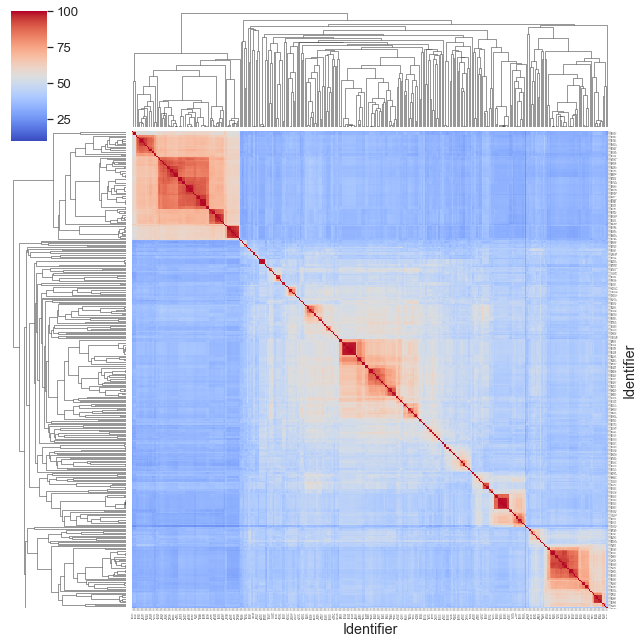

In [13]:
all_ctd_pid_matrix_df = allpylrs_pid_matrix_df
all_ctd_dist_matrix = allpylrs_dist_matrix

clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0).fit(all_ctd_dist_matrix) 
          
all_ctd_pid_linkage_matrix = get_linkage_matrix(clustering)

all_ctd_dist_matrix_condensed = scipy.spatial.distance.squareform(all_ctd_dist_matrix)
all_ctd_pid_linkage_matrix = scipy.cluster.hierarchy.optimal_leaf_ordering(all_ctd_pid_linkage_matrix,
                                                                           all_ctd_dist_matrix_condensed)



plt.rc('xtick',labelsize=1)
plt.rc('ytick',labelsize=1)

linkage = all_ctd_pid_linkage_matrix

sns.set(font_scale=1.2)


all_ctd_pid_clustermap = sns.clustermap(all_ctd_pid_matrix_df, cmap="coolwarm", vmin=10,vmax=100,
                        xticklabels=True, yticklabels=True, 
                        row_linkage=linkage, col_linkage=linkage)
#all_ctd_pid_clustermap.fig.suptitle("All PylRS CTD PID Average Linkage Clustering (euclidean, optimal ordering)")

all_ctd_pid_clustermap.ax_heatmap.set_xticklabels(all_ctd_pid_clustermap.ax_heatmap.get_xmajorticklabels(), 
                                                  fontsize = 1.3)
all_ctd_pid_clustermap.ax_heatmap.set_yticklabels(all_ctd_pid_clustermap.ax_heatmap.get_ymajorticklabels(), 
                                                  fontsize = 1.3)

all_ctd_pid_clustermap.ax_heatmap.tick_params('x', bottom=True)
all_ctd_pid_clustermap.ax_heatmap.tick_params('both', length=2.5, pad = 1, width=0.25)


print("Plot:")

plt.savefig('All-CTD-PID-AV-AGGLOM100-OPT-Clustermap.pdf',
            dpi=150, figsize=(20,20), bbox_inches="tight", pad_inches=1)

For the 37 generated PylRS clusters, we used ARAGORN to find the cognate tRNAs.  For 35 out of 37 clusters, we found a tRNA corresponding to a representative RS from each cluster.  We manually aligned these based on predicted cloverleaf structure and performed hierarchical clustering using a sequence identity threshold of 75% (and using average linkage).  This resulted in 8 PyltRNA clusters.

In [14]:
pid55_good_pylt_manual_aligned_records = []

for record in SeqIO.parse("PID55-Repr-PylTs-manual-align.fasta","fasta"):
    pid55_good_pylt_manual_aligned_records.append(record)
    

trna_pid_matrix = np.zeros((len(pid55_good_pylt_manual_aligned_records), len(pid55_good_pylt_manual_aligned_records)))

for i in range(0, len(pid55_good_pylt_manual_aligned_records)):
    
    for j in range(0, len(pid55_good_pylt_manual_aligned_records)):
        
        seq_i = str(pid55_good_pylt_manual_aligned_records[i].seq)
        seq_j = str(pid55_good_pylt_manual_aligned_records[j].seq)
        
        pid = get_pid(seq_i, seq_j)
        
        trna_pid_matrix[i][j] = pid

        
trna_dist_matrix = (100-trna_pid_matrix)/100


#First let's try clustering based on a similarity of 75%
#This translates to a distance threshold of 0.25

print("Average linkage")
clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0.25).fit(trna_dist_matrix)


pylt_pid75_clustering_label_dict = {}
for i in range(0, max(clustering.labels_)+1):
    
    for j, label in enumerate(clustering.labels_):
        if label == i:
            print(pid55_good_pylt_manual_aligned_records[j].id.ljust(15), i)
            pylt_pid75_clustering_label_dict[pid55_good_pylt_manual_aligned_records[j].id] = i


Average linkage
Dsp.6271(I2)    0
Cobs.8365(Obs)  0
Djoe.7843(Joe)  0
Dsp.4212(Thio)  0
Aara.1903(Ara)  0
Fbac.0826(F2)   0
Cbac.2529(Clos) 0
Sbac.7250(Spi)  0
Abac.1451(Bacc) 0
Ppau.7396(Pau)  0
Mfun.4926(Fun)  0
Dvac.9529(Vac)  0
Fbac.5844(F11)  0
Dsp.9351(Mic)   0
Fbac.3183(F14)  0
Dbac.9416(Deb)  0
Cfer.2237(Fer)  0
Dinf.6409(Inf)  0
Abac.2280(Act)  0
Cbac.8451(Dia)  0
Drha.8345(Rhab) 0
Bwad.0989(Wads) 0
Barc.2298(Bathy) 1
Narc.2415(Nitra) 1
Mthe.6791(Tron) 2
Mthe.7552(Therm1) 2
Marc.6481(SCGC) 2
Mthe.9096(Therm2) 3
Mmaz.3391(Mm)   4
Gbac.3691(Gem)  5
Mint.8777(Int)  6
Marc.1052(I24)  6
Marc.1509(Mesa) 6
Msp.5345(Mass)  6
Malv.5008(Alv)  7


Clusters 0 and 5 are bacterial class S, clusters 12, and 3 are archaeal class C, class 4 is archaeal class N, class 6 is archaeal class B, and class 7 is archaeal class A.

To plot the clustergram of the tRNAs:

Average linkage
Plot:


/var/folders/sy/t0912wdd4219tbx1q2d7qdhh0000gn/T/ipykernel_41952/699313407.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('PID55-PylT-ManAligned-PID-CTCTAAA-AV-AGGLOM100-OPT-Clustermap.pdf',


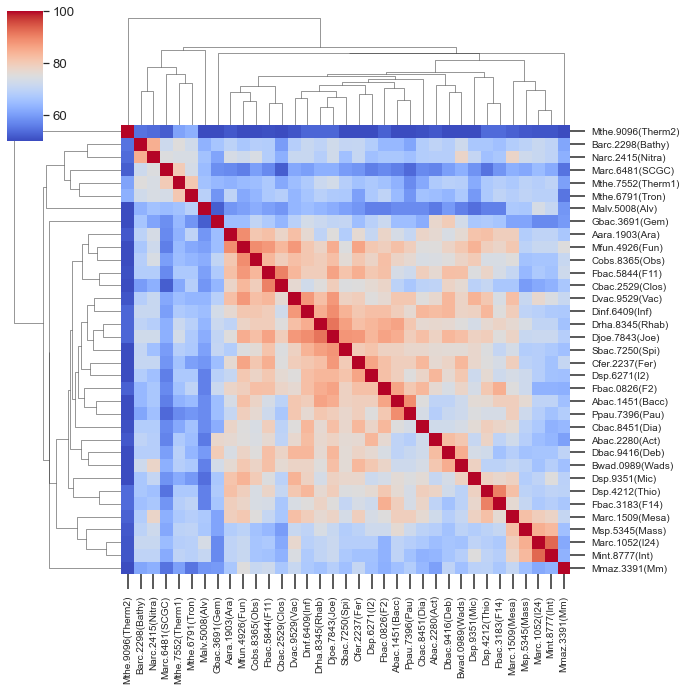

In [15]:
trna_pid_matrix_df = pd.DataFrame(trna_pid_matrix, 
                                    columns = [rec.id for rec in pid55_good_pylt_manual_aligned_records], 
                                    index = [rec.id for rec in pid55_good_pylt_manual_aligned_records])

print("Average linkage")
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None, affinity="precomputed", 
                                     linkage = "average", distance_threshold=0).fit(trna_dist_matrix)

        
            
linkage_matrix = get_linkage_matrix(clustering)

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

trna_dist_matrix_condensed = scipy.spatial.distance.squareform(trna_dist_matrix)
linkage_matrix = scipy.cluster.hierarchy.optimal_leaf_ordering(linkage_matrix,
                                                               trna_dist_matrix_condensed)



plt.rc('xtick',labelsize=1)
plt.rc('ytick',labelsize=1)

linkage = linkage_matrix

sns.set(font_scale=1.2)


clustermap = sns.clustermap(trna_pid_matrix_df, cmap="coolwarm", vmin=50,vmax=100,
                        xticklabels=True, yticklabels=True, 
                        row_linkage=linkage, col_linkage=linkage)


clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xmajorticklabels(), 
                                                  fontsize = 10)
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_ymajorticklabels(), 
                                                  fontsize = 10)

clustermap.ax_heatmap.tick_params('x', bottom=True)
clustermap.ax_heatmap.tick_params('both', length=15, pad = 6, width=1.5)


print("Plot:")

plt.savefig('PID55-PylT-ManAligned-PID-CTCTAAA-AV-AGGLOM100-OPT-Clustermap.pdf',
            dpi=150, figsize=(20,20), bbox_inches="tight", pad_inches=1)

## 3 - Enumeration of sets of multiply orthogonal pairs ('multiplets')

Identification of multiply orthogonal pairs from a table of RS/tRNA activity data may be done as follows (full function code is below):

In [22]:
all_gfp_df = pd.read_csv("Fig4_allscreendata_with_evol.csv", index_col = 0, sep=',')
pd.options.display.max_columns = 25

#Enumerate all doubly orthogonal pairs i.e. doublets
#with a minimal paired activity (diagonal term) of 40% of wild-type GFP expression
#and a maximal unpaired cross-reactivity (off_diagonal term) of 20% of wild-type GFP expression
all_gfp_doublets = getMultiplets(all_gfp_df, 2, 40, 20)

#Now, set an orthogonality coefficient (o.c.) threshold of 2.5 (include only doublets with o.c. > 2.5)
#Group doublets into families based on a unique combination of RSs
print("o.c. > 2.5:")
all_gfp_doublet_families = getBestMultipletsWithOCThresh(all_gfp_doublets, all_gfp_df, 2.5, print_multiplets=False)
#Note - use print_multiplets=False to see all multiplets and their o.c. scores,
#not just the best representative for each family
#but this generates a lot of text

print()
print("o.c. > 5.0:")
#Now, set a stricter o.c. threshold of 5.0 (comparable to a previously reported triply orthogonal pair reported in https://www.nature.com/articles/s41557-020-0472-x)
all_gfp_doublet_families = getBestMultipletsWithOCThresh(all_gfp_doublets, all_gfp_df, 5.0)

o.c. > 2.5:
Total number of multiplets: 1136
Total number of multiplet families: 27

o.c. > 5.0:
Total number of multiplets: 924
Total number of multiplet families: 22


As reported in the manuscript, with an o.c. threshold of 5.0 we find 924 doubly orthogonal pairs within 22 distinct families.

In [23]:
example_doublet_family = all_gfp_doublet_families[('C Nitra', 'S Deb')]

print("Let's look at the doublet family ('C-NitraRS', 'S-DebRS')")
print("Best doublet in family:", example_doublet_family[0])
print("o.c. of best doublet:", example_doublet_family[1])
print("Number of doublets in this family:", example_doublet_family[2])
print("Row-wise orthogonality:", example_doublet_family[3])


Let's look at the doublet family ('C-NitraRS', 'S-DebRS')
Best doublet in family: ('C Nitra', 'SCGC', 'S Deb', 'I2 H52')
o.c. of best doublet: 37.9168671228661
Number of doublets in this family: 11
Row-wise orthogonality: [37.9168671228661, 51.76983393936371]


In [24]:
print("Triply orthogonal pairs")
all_gfp_triplets = getMultiplets(all_gfp_df, 3, 40, 20)
all_gfp_triplet_families = getBestMultipletsWithOCThresh(all_gfp_triplets, all_gfp_df, 5.0)

print()
print("Quadruply orthogonal pairs")
all_gfp_quadruplets = getMultiplets(all_gfp_df, 4, 40, 20)
all_gfp_quadruplet_families = getBestMultipletsWithOCThresh(all_gfp_quadruplets, all_gfp_df, 5.0)

print()
print("Quintuply orthogonal pairs")
all_gfp_quintuplets = getMultiplets(all_gfp_df, 5, 40, 20)
all_gfp_quintuplets_families = getBestMultipletsWithOCThresh(all_gfp_quintuplets, all_gfp_df, 5.0)

Triply orthogonal pairs
Total number of multiplets: 1324
Total number of multiplet families: 18

Quadruply orthogonal pairs
Total number of multiplets: 128
Total number of multiplet families: 7

Quintuply orthogonal pairs
Total number of multiplets: 8
Total number of multiplet families: 1


As reported in the manuscript, with an o.c. threshold of 5.0 we find:
- 1324 triplets in 18 families
- 128 quadruplets in 7 families
- 8 quintuplets in 1 family 

We can visualize the best quintuplet:

	+ Mm		A 1R26		B Lum1		C Nitra		S Deb
Met	108		2		3		2		6
Alv 21	1		83		2		6		1
I2 B72	2		2		49		8		6
Therm1	5		3		4		70		3
I2 H52	2		1		1		1		43
              + Mm     A 1R26     B Lum1    C Nitra      S Deb
Met     108.182346   2.097448   2.932460   1.834217   5.951858
Alv 21    1.338729  83.139498   2.273406   5.893229   0.829701
I2 B72    1.846368   1.740647  49.301297   7.954308   6.045266
Therm1    4.701648   3.332819   3.612018  69.992907   3.152967
I2 H52    1.543058   0.955468   0.798478   0.827823  42.856283

Orthogonality Coefficient: 5.388
Row quotients: [18.176, 14.108, 6.198, 14.887, 27.774]



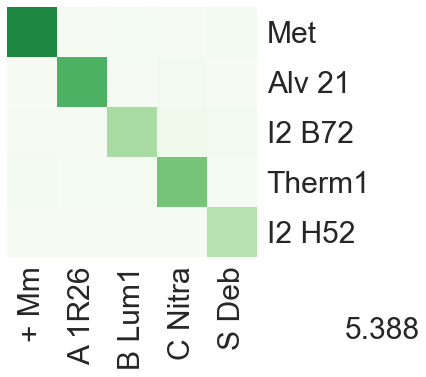

In [25]:
plot_multiplets(all_gfp_df, all_gfp_quintuplets_families, vmin=0, vcenter=None, vmax=140)

In [ ]:
### FUNCTION CODE ###

In [17]:
def getMultiplets(df, n, min_diag, max_offdiag):
    # df - table of activity data
    # n - order of the multiplet (n=2 for doubly orthogonal pairs i.e. doublet, 3 for triplet etc)
    # min_diag - the minimal paired activity acceptable (as a % of wild type GFP expression)
    # max_diag - the maximal cross-reactivity acceptable (as a % of wild type GFP expression)
    
    #multiplets are output in the form (rs1, t1, rs2, t2, ... , rsn, tn) by alphabetic order of the RSs
    
    assert(n>=2)
    
    rst_combinations = []
    for rs in df.columns:
        for t in df.index:
            if not np.isnan(df[rs][t]):
                rst_combinations.append((rs,t))
    
    if n == 2:
        
        nplets = []
        
        for i1, (rs1,t1) in enumerate(rst_combinations):
            for i2, (rs2,t2) in enumerate(rst_combinations):

                #avoid duplicates e.g. (rs_a,t_a,rs_b,t_b) and (rs_b,t_b,rs_a,t_a) should not both be stored
                if not rs1<rs2:
                    continue

                #check all diagonal terms > min_diag
                if not(df[rs1][t1] > min_diag and df[rs2][t2] > min_diag):
                    continue

                #all inequalities with nan are automatically false
                #so we don't need to check if off diagonal terms are nan

                #check all off diagonal terms < max_offdiag
                if not(df[rs1][t2] < max_offdiag):
                    continue
                if not(df[rs2][t1] < max_offdiag):
                    continue                               

                nplets.append((rs1,t1,rs2,t2))
        
    else: # n>2

        n_minus_one_plets = getMultiplets(df, n-1, min_diag, max_offdiag)

        nplets = []

        for i1, nm1plet in enumerate(n_minus_one_plets):
            for rsn, tn in rst_combinations:

                #avoid duplicates - assert rs1<rs2<rs3<...<rsn:
                #duplicate = False
                #for i in range(0,len(nm1plet)-2,2):
                #    if not nm1plet[i] < nm1plet[i+2]:
                #        duplicate = True
                if not nm1plet[-2] < rsn: #the rest is checked by recursion
                    continue

                #check newest diagonal term > min_diag
                if not df[rsn][tn] > min_diag:
                    continue

                #check all off diagonal terms with rsn or tn < max_offdiag
                #(i.e. those not yet checked by recursion (n-1 multiplet finding))
                acceptable = True
                for i in range(0,len(nm1plet),2):
                    rsi = nm1plet[i]
                    if not df[rsi][tn] < max_offdiag:
                        acceptable = False

                for i in range(1,len(nm1plet),2):
                    ti = nm1plet[i]
                    if not df[rsn][ti] < max_offdiag:
                        acceptable = False

                if acceptable == False:
                    continue

                nplets.append(nm1plet+(rsn,tn))
                    
    return nplets

In [18]:
def getBestMultipletsWithOCThresh(multiplets, df, oc_threshold, 
                                     return_ocs=False,
                                   print_multiplets=False):
    #input a set of multiplets and group them into families having a unique combination of RSs
    #store all families with the representative quad (the one with the best quotient aka orthogonality coefficient)
    #as well as the family size
    #and the quotients for every row
    #only add quads to families if o.c. (aka quotient) > oc_threshold
    
    #family format = (best_multiplet, quotient_of_best_multiplet, number_multiplets_in_family, row_quotients_of_best_multiplet)

    families = {}
    total_multiplets = 0
    oc_list = [] #list of all the OCs (with oc > oc_thresh)
    
    
    for multiplet in multiplets:
        
        rss = tuple([multiplet[i] for i in range(0,len(multiplet),2)])
        ts = tuple([multiplet[i] for i in range(1,len(multiplet),2)])
        assert(len(rss) == len(ts))
        
        min_diag_term = min([ df[rss[i]][ts[i]] for i in range(0,len(rss)) ])
        max_off_diag_term = max([ df[rss[i]][ts[j]] for i in range(0,len(rss)) for j in range(0,len(ts)) if i != j])
        
        
        quotient = min_diag_term/max_off_diag_term
        if quotient <= oc_threshold:
            continue
        total_multiplets += 1
        oc_list.append(quotient)
    
    
        if print_multiplets:
            print(str(multiplet).strip("()").replace("'",""),",", quotient)
        
        #also get the quotient of diag to max off diag FOR EVERY ROW (i.e. every tRNA)
        row_quotients = []
        for j in range(0, len(ts)):
            row_diag = df[rss[j]][ts[j]]
            row_max_off_diag = max([ df[rss[i]][ts[j]] for i in range(0,len(rss)) if i != j]) 
            quo_row = row_diag/row_max_off_diag
            row_quotients.append(quo_row)
            

        if rss not in families: #note rss are already alphabetically sorted
            
            families[rss] = (multiplet, quotient, 1, row_quotients)

        else:

            if quotient > families[rss][1]: #if quotient > max quotient for that family
                
                family_size = families[rss][2]
                
                families[rss] = (multiplet, quotient, family_size+1, row_quotients)
                
            elif quotient == families[rss][1]: #if quotient = max quotient for that family
                                                                #then use row quotients to break the tie
                #if row quotients are equal or greater than current best multiplet for every row,
                #then this new multiplet is better
                current_best_row_quotients = families[rss][3]
                new_best = True
                for i, rq in enumerate(row_quotients):
                    if rq < current_best_row_quotients[i]:
                        new_best=False
                
                if new_best:
                    #print("OLD:",families[(rs1,rs2,rs3,rs4,rs5)])
                    #print("NEW:", rs1,t1,rs2,t2,rs3,t3,rs4,t4,rs5,t5, quotient, row_quotients)
                    family_size = families[rss][2]
                    families[rss] = (multiplet, quotient, family_size+1, row_quotients)                
                
            else: #simply increase the size of the family without affecting the best representative multiplet
                
                family = families[rss]
                                
                family_with_incremented_size = (family[0], family[1], family[2]+1, family[3])
                
                families[rss] = family_with_incremented_size
        
    print("Total number of multiplets:", total_multiplets)
    print("Total number of multiplet families:", len(families))
    if return_ocs:
        return families, total_multiplets, oc_list
    return families
        
        

In [19]:
def fixedWidthClusterMapFromDF(dataFrame, vmin, vcenter, vmax, cellSizePixels=50,
                         save_pdf = "", only_heatmap=False, heatmap_show_cbar=True, 
                               heatmap_title=None, heatmap_annotate_values=False):
    
    #see: https://stackoverflow.com/questions/52806878/seaborn-clustermap-fixed-cell-size
    
    plt.rcParams["font.family"] = "Arial"
    
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = dataFrame.shape
    figWidth = (Nx*cellSizePixels/dpi)/0.8/marginWidth
    figHeight = (Ny*cellSizePixels/dpi)/0.8/marginHeight

    # do the actual plot
    plt.rc('xtick',labelsize=30)
    plt.rc('ytick',labelsize=30)
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
    cmap = "coolwarm"
    if vcenter == None:
        norm = Normalize(vmin=vmin, vmax=vmax)
        cmap = "Greens"
        
    if only_heatmap:
        plt.figure(figsize=(figWidth, figHeight))
        grid=sns.heatmap(dataFrame, cmap=cmap, #coolwarm
                         norm=norm, vmin=vmin, vmax=vmax,
                         xticklabels=True, yticklabels=True,
                         cbar = heatmap_show_cbar, annot = heatmap_annotate_values,
                         cbar_kws={"orientation": "vertical",
                                   "spacing": "proportional"})
        grid.xaxis.tick_bottom()
        grid.yaxis.tick_right()
        plt.yticks(rotation=0) 
        plt.xticks(rotation=90)
        
        if heatmap_title is not None:
            plt.title(heatmap_title, x=1.5, y=-0.35, fontsize=30) 

        
        # calculate the size of the heatmap axes
        axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
        axHeight = (Ny*cellSizePixels)/(figHeight*dpi)

        # resize heatmap
        ax_heatmap_orig_pos = grid.get_position()
        grid.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                      axWidth, axHeight])
        
        #remove ticks (but leave tick labels)
        grid.tick_params(bottom=False, right=False)
        
        #resize colorbar
        #ax = plt.gca()        
        #plt.colorbar()
        
    else:
        grid = sns.clustermap(dataFrame, figsize=(figWidth, figHeight), cmap=cmap, #coolwarm
                              norm=norm, vmin=vmin, vmax=vmax, xticklabels=True, yticklabels=True)

        # calculate the size of the heatmap axes
        axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
        axHeight = (Ny*cellSizePixels)/(figHeight*dpi)

        # resize heatmap
        ax_heatmap_orig_pos = grid.ax_heatmap.get_position()
        grid.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                      axWidth, axHeight])

        # resize dendrograms to match
        ax_row_orig_pos = grid.ax_row_dendrogram.get_position()
        grid.ax_row_dendrogram.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                             ax_row_orig_pos.width, axHeight])
        ax_col_orig_pos = grid.ax_col_dendrogram.get_position()
        grid.ax_col_dendrogram.set_position([ax_col_orig_pos.x0, ax_heatmap_orig_pos.y0+axHeight,
                                             axWidth, ax_col_orig_pos.height])


    if save_pdf:
        plt.savefig(save_pdf+'.pdf',
            dpi=150, bbox_inches="tight", pad_inches=1)
    
    return grid # return ClusterGrid object

In [20]:
def plot_multiplets(df, multiplet_families, vmin=0, vcenter=20, vmax=100,
                 save_pdf_prefix = "", save_pdf_post = ""):
    #plot the best multiplets in each family as activity heatmaps
    
    for family, (best_multiplet, quotient, family_size, row_quotients) in multiplet_families.items():

        rss = tuple([best_multiplet[i] for i in range(0,len(best_multiplet),2)])
        ts = tuple([best_multiplet[i] for i in range(1,len(best_multiplet),2)])
        
        mat = np.zeros((len(ts), len(rss)))
        
        for j in range(0,len(ts)):
            mat[j] = [df[rss[i]][ts[j]] for i in range(0,len(rss))]
            
        print("\t"+"\t\t".join(rss))
        for j in range(0, len(ts)):
            print(ts[j]+"\t"+"\t\t".join([str(int(round(mat[j][i]))) for i in range(0,len(rss))]))
        
        
        best_multiplet_df = pd.DataFrame(data=mat, index=list(ts), columns=list(rss))
        print(best_multiplet_df)
        print()
        print("Orthogonality Coefficient:", round(quotient,3))
        print("Row quotients:", [round(rq,3) for rq in row_quotients])
        print()
        
        
        grid = fixedWidthClusterMapFromDF(best_multiplet_df, vmin=vmin, vcenter=vcenter,
                                          vmax=vmax, cellSizePixels=50, 
                                          save_pdf = (save_pdf_prefix+" ".join(rss)+" "+save_pdf_post).strip(),
                                          only_heatmap=True, heatmap_show_cbar=False,
                                         heatmap_title=str(round(quotient,3)), heatmap_annotate_values=False)
        plt.show()